In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import sns as sns
import torch
import torch.optim as optim
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_palette("bright")

from sklearn.metrics import confusion_matrix
import numpy as np

In [245]:
### Load the data
seed = 1
data_path = 'data/output/data_complete_grouped_2022-06-30.csv'
df = pd.read_csv(data_path)
interesting_cols = ['dataset', 'Avg. Temperature', 'RH', 'va', 'Tg', 'Age', 'Height', 'Weight', 'Icl',
       'Thermal feeling (global)']
df = df[interesting_cols]

In [246]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
M = scaler.fit_transform(df.drop(columns=['dataset']))
#M = df.drop(columns=['dataset']).to_numpy()
#y = M[:,-1]
y = df['Thermal feeling (global)'].to_numpy()
X = M[:,:-1]
#X = M[:,[1,5,6,7,8,10]]
#X = M

In [247]:
df.shape[1]

10

In [248]:
n_components = df.shape[1] - 2 # -1 for the target, -1 for the dataset

In [249]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

print(pca.explained_variance_ratio_)

[0.3698441  0.20598791 0.13811518 0.1218682  0.07973628 0.04516428
 0.03782625 0.0014578 ]


In [250]:
pca.components_

array([[-5.57585458e-01,  3.72170135e-01, -1.51277226e-01,
        -5.58135667e-01,  1.34575059e-01, -4.49677615e-02,
        -1.31175559e-02,  4.42586726e-01],
       [ 3.85782775e-02, -4.89015261e-02, -5.74304739e-02,
         4.06506063e-02, -8.73796212e-02, -6.87948783e-01,
        -7.12053689e-01,  5.69248915e-02],
       [ 2.78676063e-02,  4.29528870e-01,  7.62144525e-01,
         9.43218694e-03,  4.03970390e-01, -1.80158732e-01,
         2.00383639e-02, -1.94227505e-01],
       [ 8.59068677e-02, -2.69446766e-01, -3.41546245e-01,
         8.65166884e-02,  8.68745950e-01, -1.62828626e-01,
         1.10330294e-01,  4.97394673e-02],
       [-3.74905261e-02, -5.87266772e-01,  5.08637806e-01,
        -9.05279831e-03,  1.79354681e-02,  1.16583642e-01,
        -6.90417719e-02,  6.13382128e-01],
       [-3.78515501e-01, -4.86549818e-01,  1.28002187e-01,
        -3.80374472e-01, -9.71161912e-02, -3.43416784e-01,
         2.84557477e-01, -5.00586048e-01],
       [ 1.91890076e-01,  1.416346

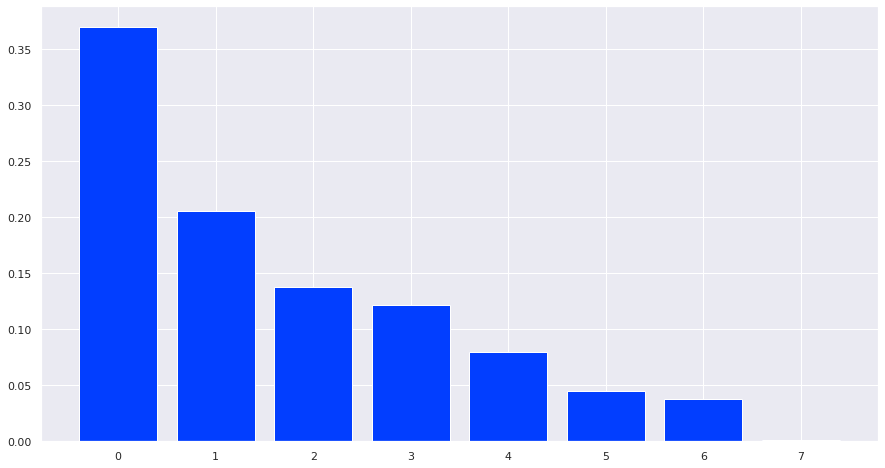

In [251]:
plt.bar(range(n_components), pca.explained_variance_ratio_)
plt.show()

In [252]:
pca_df = pd.DataFrame(X_pca, columns=['PCA'+str(i) for i in range(n_components)])
pca_df['target'] = y
pca_df['target'] = pca_df['target'].astype(str)

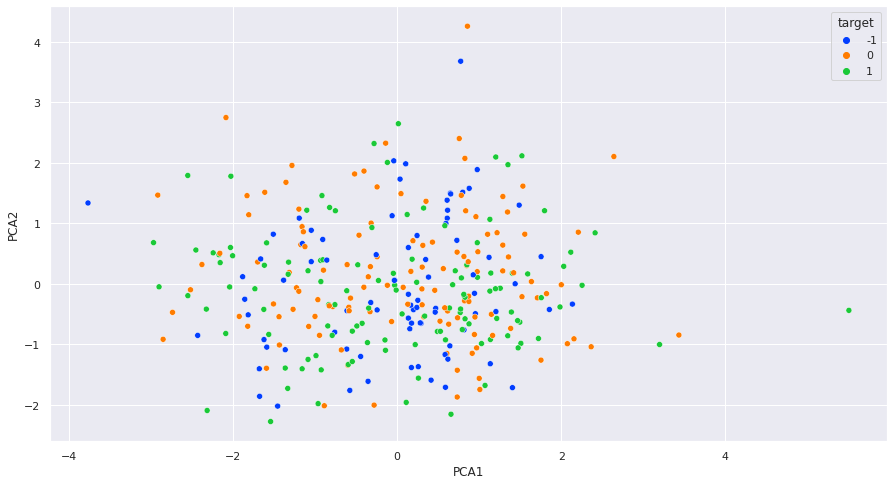

In [253]:

sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='target')
plt.show()

In [254]:
import plotly.express as px
fig = px.scatter_3d(pca_df, x='PCA1', y='PCA2', z='PCA3', color='target')
fig.show()

In [255]:
df_components = pd.DataFrame(pca.components_, columns=df.columns[1:-1])

In [256]:
df_components.head()

,Avg. Temperature,RH,va,Tg,Age,Height,Weight,Icl
0,-0.557585,0.372170,-0.151277,-0.558136,0.134575,-0.044968,-0.013118,0.442587
1,0.038578,-0.048902,-0.057430,0.040651,-0.087380,-0.687949,-0.712054,0.056925
2,0.027868,0.429529,0.762145,0.009432,0.403970,-0.180159,0.020038,-0.194228
3,0.085907,-0.269447,-0.341546,0.086517,0.868746,-0.162829,0.110330,0.049739
4,-0.037491,-0.587267,0.508638,-0.009053,0.017935,0.116584,-0.069042,0.613382
